# This Notebook is to accompany article Estimate the Causal Effect Intervention on Time Series with causalimpact

Article: https://towardsdatascience.com/estimate-the-causal-effect-intervention-on-time-series-with-causalimpact-e949c5cd4147?sk=777ddf39adeca0f5ba2c0daa68f7f29c

In [1]:
from yahoo_historical import Fetcher
from causalimpact import CausalImpact

In [2]:
df = pd.read_csv('daily-website-visitors.csv')

In [3]:
# df = Fetcher('INDF.JK',[2018,1,1],[2021,1,18]).getHistorical()

In [4]:
df['Date'] = pd.to_datetime(df['Date'])

In [5]:
df = df.set_index('Date')

In [6]:
all_date = pd.date_range(start = '20140914', end = '20200819')

In [7]:
df['Page.Loads'] = df['Page.Loads'].str.replace(',', '').astype('int')

In [8]:
impact = df.copy()

In [9]:
impact['Page.Loads'] = df['Page.Loads'].rolling(7).mean()

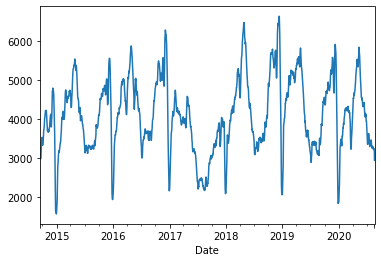

In [10]:
df['Page.Loads'].rolling(7).mean().plot()

In [11]:
impact = impact.dropna().rename(columns = {'Page.Loads': 'y'})

In [12]:
impact.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2161 entries, 2014-09-20 to 2020-08-19
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Row                2161 non-null   int64  
 1   Day                2161 non-null   object 
 2   Day.Of.Week        2161 non-null   int64  
 3   y                  2161 non-null   float64
 4   Unique.Visits      2161 non-null   object 
 5   First.Time.Visits  2161 non-null   object 
 6   Returning.Visits   2161 non-null   object 
dtypes: float64(1), int64(2), object(4)
memory usage: 135.1+ KB


In [13]:
pre_period = ['20160914', '20200331']
post_period = ['20200401', '20200819']
figsize = (20, 6)
ci = CausalImpact(impact[['y']], pre_period, post_period, prior_level_sd=None)

C:\Users\MSI\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [14]:
# pre_period = ['20180101', '20200303']
# post_period = ['20200304', '20210115']

# figsize = (20, 6)
# ci = CausalImpact(impact[['y', 'Low']], pre_period, post_period, prior_level_sd=None)

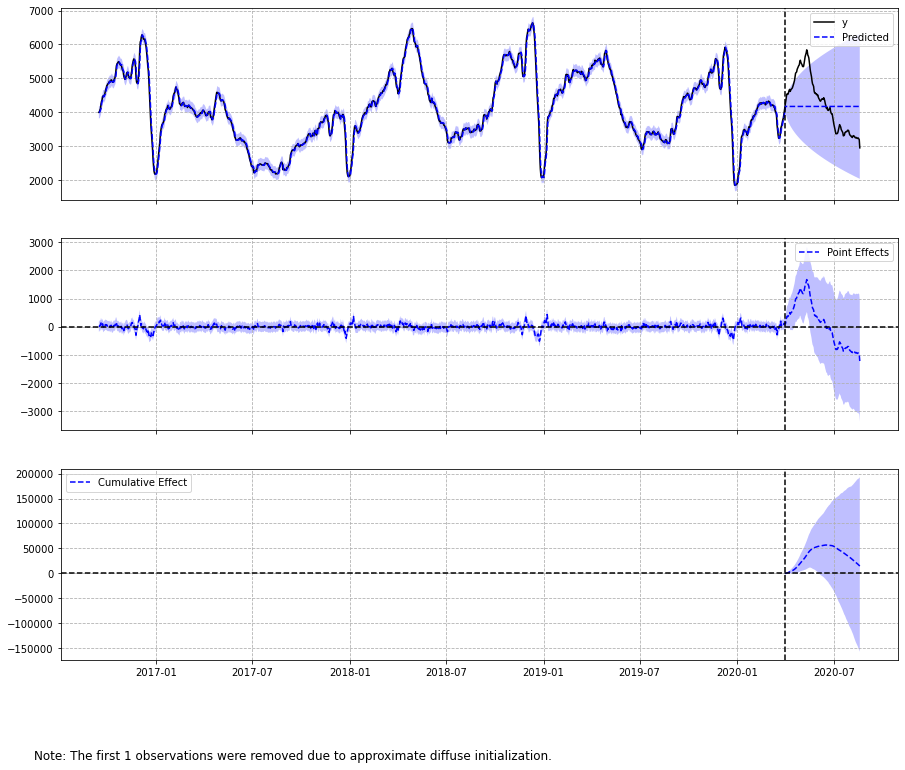

In [15]:
ci.plot(figsize=(15, 12))

In [16]:
ci.trained_model.params

sigma2.irregular    2.499153e-11
sigma2.level        7.993715e-03
dtype: float64

In [17]:
import numpy as np
import pandas as pd
from statsmodels.tsa.arima_process import ArmaProcess
from causalimpact import CausalImpact

#Creating Random Generated time data
np.random.seed(12345)
ar = np.r_[1, 0.9]
ma = np.array([1])
arma_process = ArmaProcess(ar, ma)
X = 100 + arma_process.generate_sample(nsample=100)
y = 1.2 * X + np.random.normal(size=100)
y[70:] += 5

#Data Frame with time index
data = pd.DataFrame({'y': y, 'X': X}, columns=['y', 'X'])
dated_data = data.set_index(pd.date_range(start='20180101', periods=len(data)))

#Time period for pre-intervention and post-intervention
pre_period = ['20180101', '20180311']
post_period = ['20180312', '20180410']

dated_data

,y,X
2018-01-01,118.188694,99.795292
2018-01-02,120.233276,100.663180
2018-01-03,118.627775,98.883699
2018-01-04,119.609722,100.448941
2018-01-05,121.391508,101.561734
...,...,...
2018-04-06,131.838436,104.939544
2018-04-07,118.786121,95.672520
2018-04-08,127.362025,103.146201
2018-04-09,123.600675,97.753389


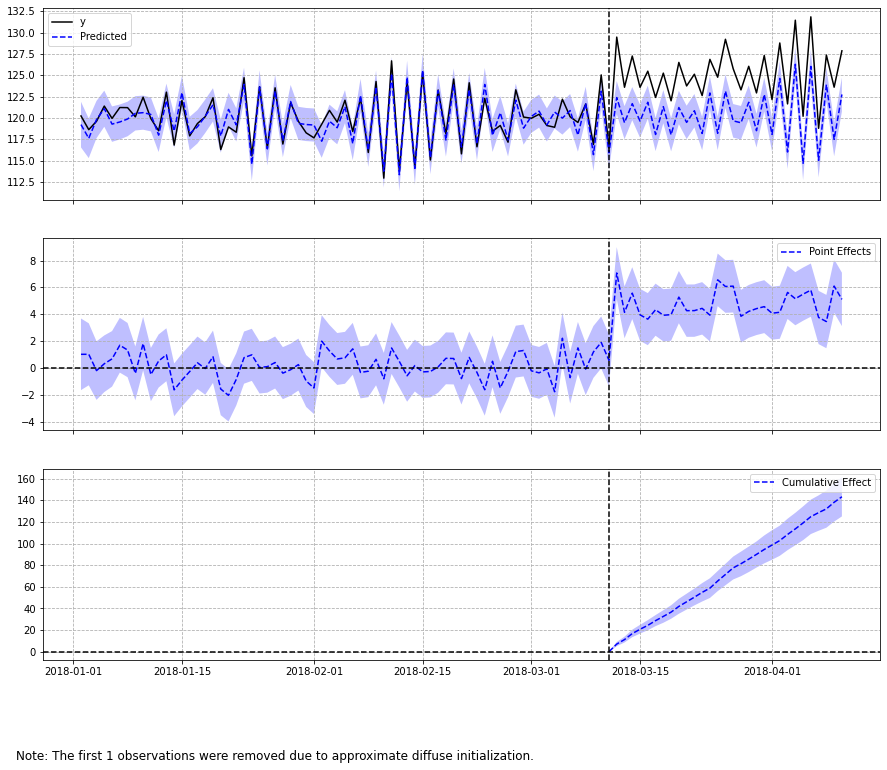

In [21]:
ci = CausalImpact(dated_data, pre_period, post_period, prior_level_sd=None)
# print(ci.summary())
# print(ci.summary(output='report'))
ci.plot()

In [22]:
print(ci.summary())

Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    125.23             3756.86
Prediction (s.d.)         120.45 (0.31)      3613.46 (9.24)
95% CI                    [119.85, 121.06]   [3595.46, 3631.67]

Absolute effect (s.d.)    4.78 (0.31)        143.41 (9.24)
95% CI                    [4.17, 5.38]       [125.19, 161.4]

Relative effect (s.d.)    3.97% (0.26%)      3.97% (0.26%)
95% CI                    [3.46%, 4.47%]     [3.46%, 4.47%]

Posterior tail-area probability p: 0.0
Posterior prob. of a causal effect: 100.0%

For more details run the command: print(impact.summary('report'))


In [23]:
print(ci.summary(output='report'))

Analysis report {CausalImpact}


During the post-intervention period, the response variable had
an average value of approx. 125.23. By contrast, in the absence of an
intervention, we would have expected an average response of 120.45.
The 95% interval of this counterfactual prediction is [119.85, 121.06].
Subtracting this prediction from the observed response yields
an estimate of the causal effect the intervention had on the
response variable. This effect is 4.78 with a 95% interval of
[4.17, 5.38]. For a discussion of the significance of this effect,
see below.


Summing up the individual data points during the post-intervention
period (which can only sometimes be meaningfully interpreted), the
response variable had an overall value of 3756.86.
By contrast, had the intervention not taken place, we would have expected
a sum of 3613.46. The 95% interval of this prediction is [3595.46, 3631.67].


The above results are given in terms of absolute numbers. In relative
terms, the response v

In [24]:
ci.inferences.head()

,post_cum_y,preds,post_preds,post_preds_lower,post_preds_upper,preds_lower,preds_upper,post_cum_pred,post_cum_pred_lower,post_cum_pred_upper,point_effects,point_effects_lower,point_effects_upper,post_cum_effects,post_cum_effects_lower,post_cum_effects_upper
2018-01-01,NaN,119.729458,NaN,NaN,NaN,-5712.599529,5952.058445,NaN,NaN,NaN,-1.540765,-5833.869752,5830.788222,NaN,NaN,NaN
2018-01-02,NaN,119.219896,NaN,NaN,NaN,116.548485,121.891306,NaN,NaN,NaN,1.013380,-1.658030,3.684791,NaN,NaN,NaN
2018-01-03,NaN,117.612838,NaN,NaN,NaN,115.298438,119.927238,NaN,NaN,NaN,1.014937,-1.299463,3.329337,NaN,NaN,NaN
2018-01-04,NaN,119.812232,NaN,NaN,NaN,117.629357,121.995108,NaN,NaN,NaN,-0.202510,-2.385385,1.980366,NaN,NaN,NaN
2018-01-05,NaN,121.083389,NaN,NaN,NaN,118.969019,123.197758,NaN,NaN,NaN,0.308120,-1.806250,2.422489,NaN,NaN,NaN


In [25]:
ci.trained_model.params

sigma2.irregular    0.104777
sigma2.level        0.000243
beta.X              0.947841
dtype: float64